<a href="https://colab.research.google.com/github/tawadesharad/Mobile-Price-Range-Prediction-Capstone-project-3/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile Price Range Prediction </u></b>

## <b> Problem Description </b>

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

## <b> Data Description </b>


### <b>Attribute Information: </b>

* ### Battery_power - Total energy a battery can store in one time measured in mAh
* ### Blue - Has bluetooth or not
* ### Clock_speed - speed at which microprocessor executes instructions
* ### Dual_sim - Has dual sim support or not
* ### Fc - Front Camera mega pixels
* ### Four_g - Has 4G or not
* ### Int_memory - Internal Memory in Gigabytes
* ### M_dep - Mobile Depth in cm
* ### Mobile_wt - Weight of mobile phone
* ### N_cores - Number of cores of processor
* ### Pc - Primary Camera mega pixels
* ### Px_height - Pixel Resolution Height
* ### Px_width - Pixel Resolution Width
* ### Ram - Random Access Memory in Mega Bytes
* ### Sc_h - Screen Height of mobile in cm
* ### Sc_w - Screen Width of mobile in cm
* ### Talk_time - longest time that a single battery charge will last when you are
* ### Three_g - Has 3G or not
* ### Touch_screen - Has touch screen or not
* ### Wifi - Has wifi or not
* ### Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/tawadesharad/Mobile-Price-Range-Prediction-Capstone-project-3/main/data_mobile_price_range.csv')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

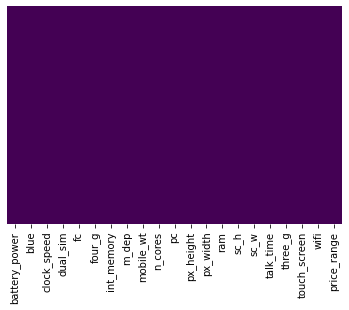

In [7]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.shape

(2000, 21)

In [10]:
list_of_columns = list(df.columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


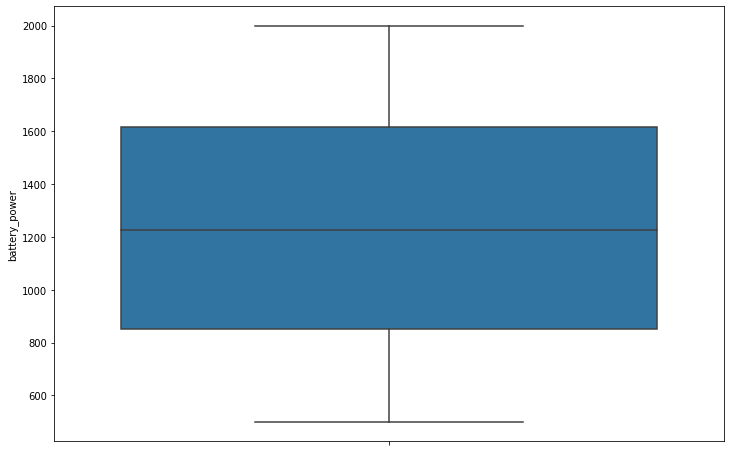

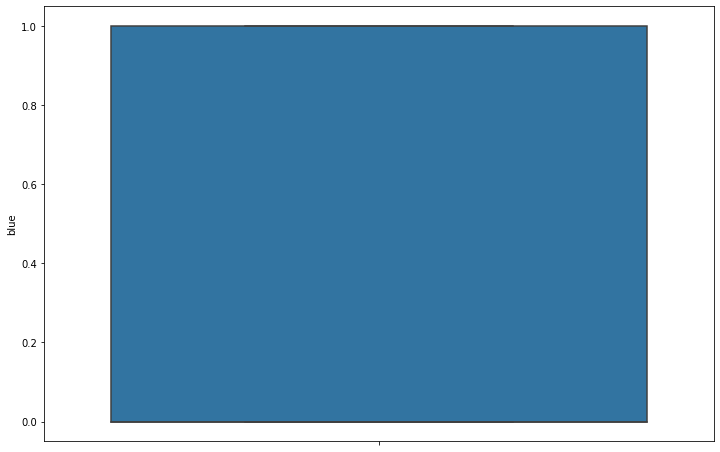

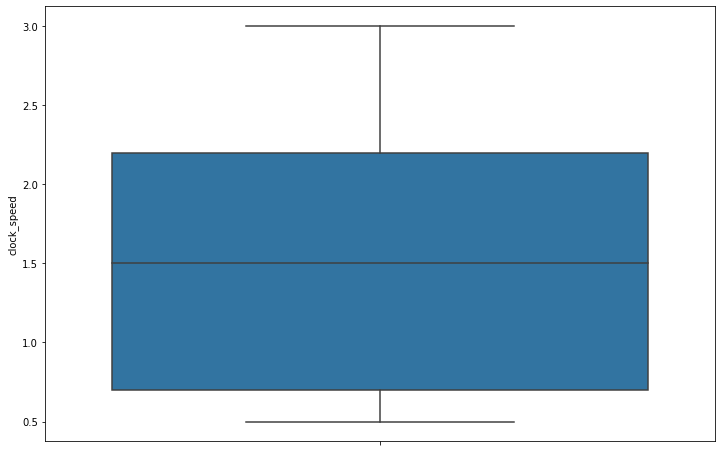

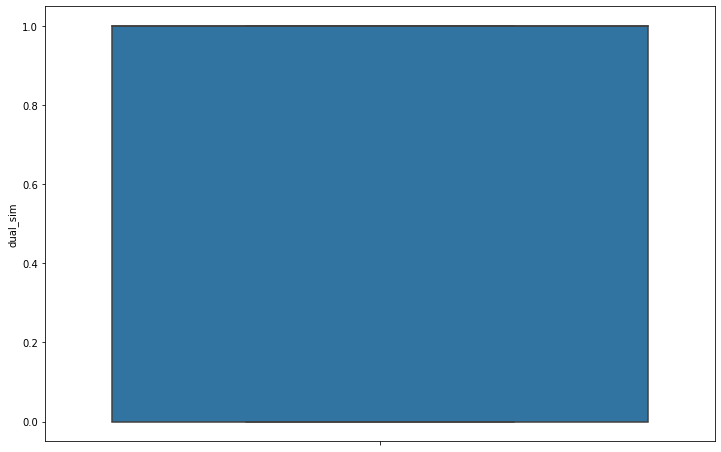

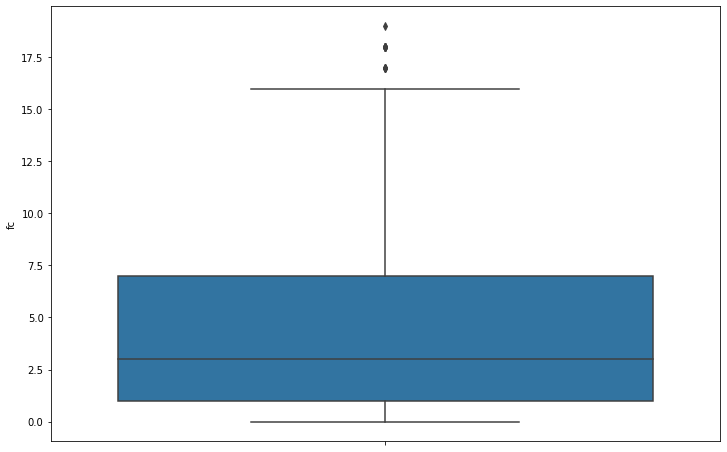

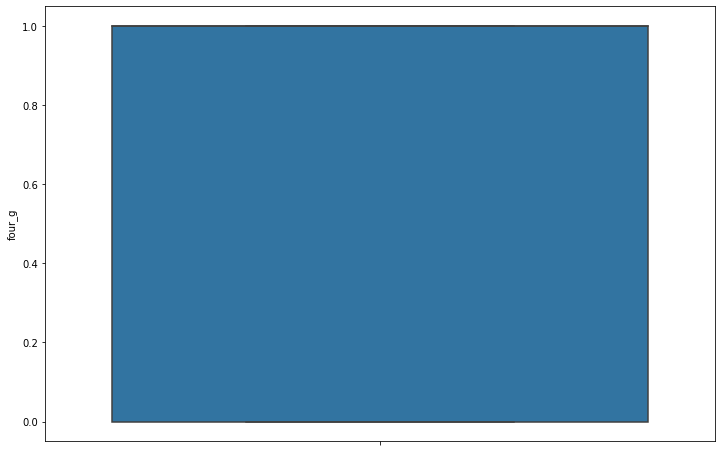

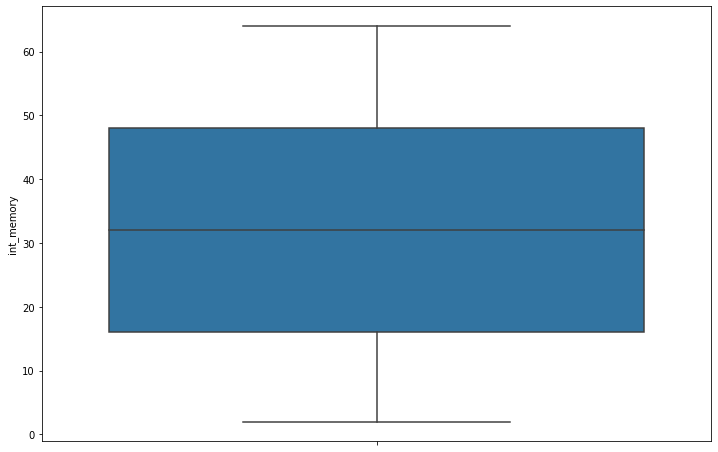

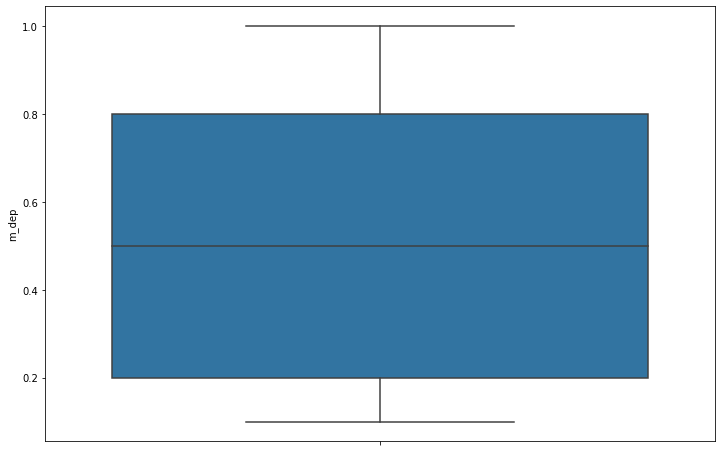

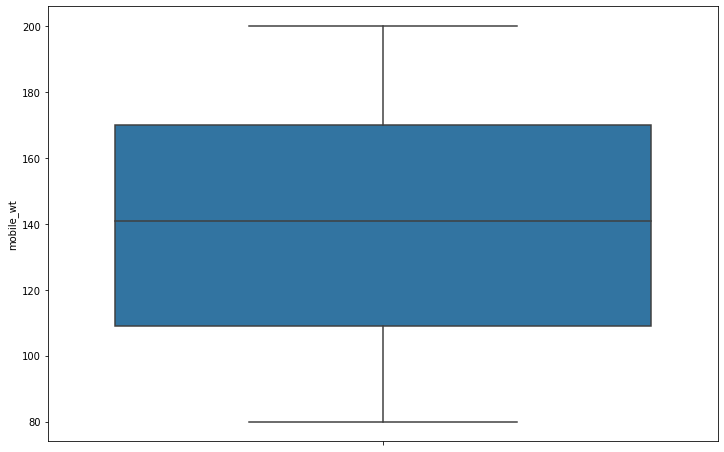

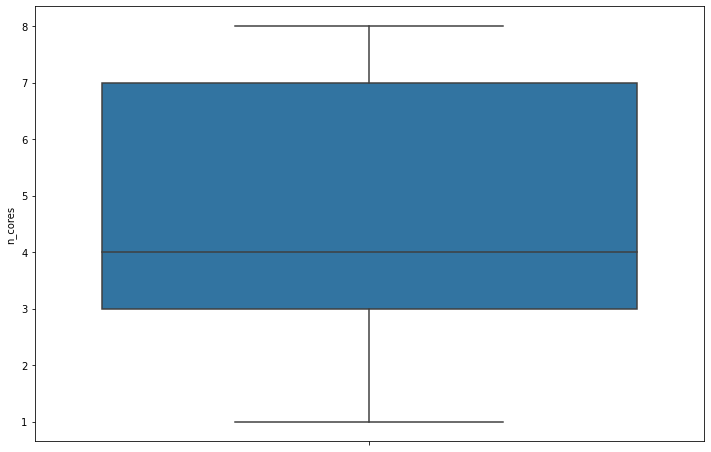

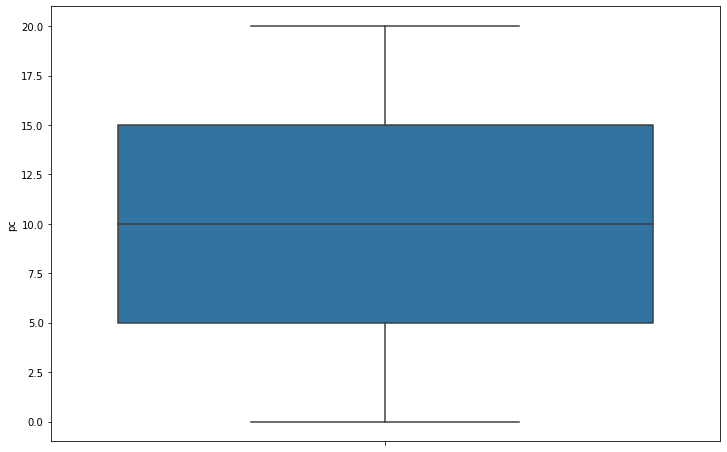

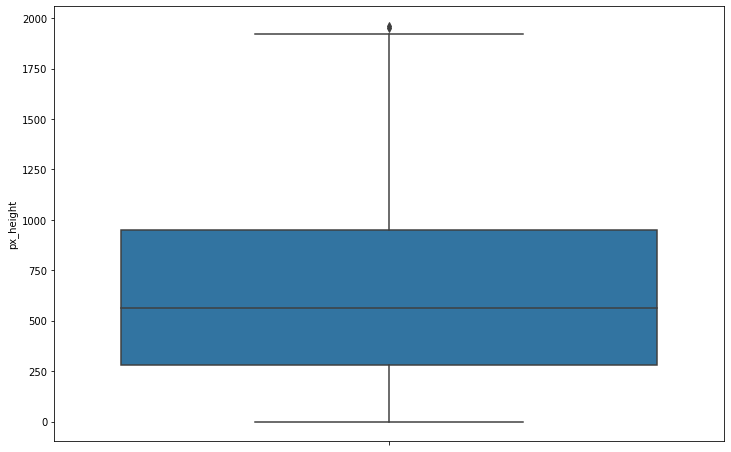

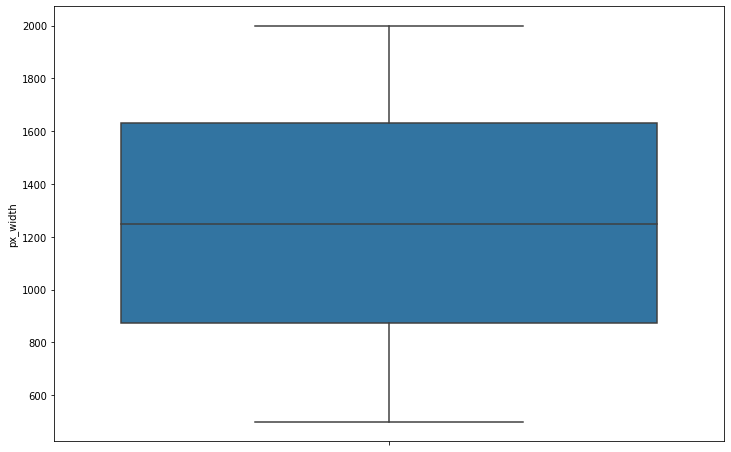

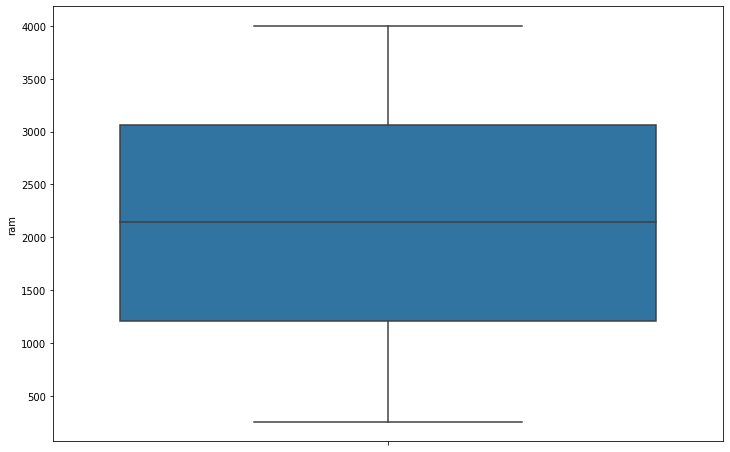

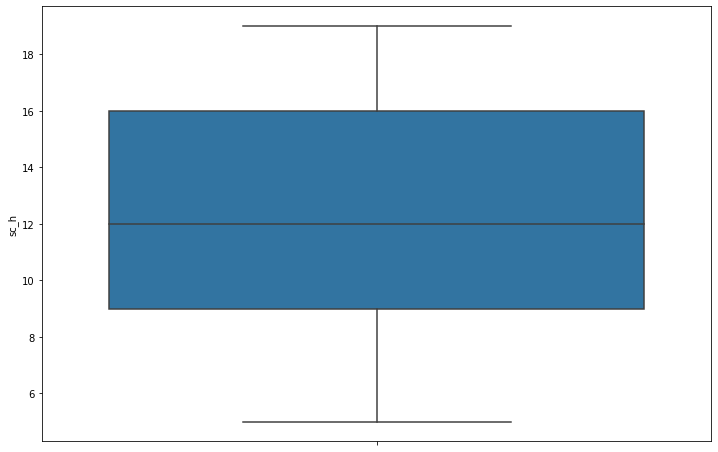

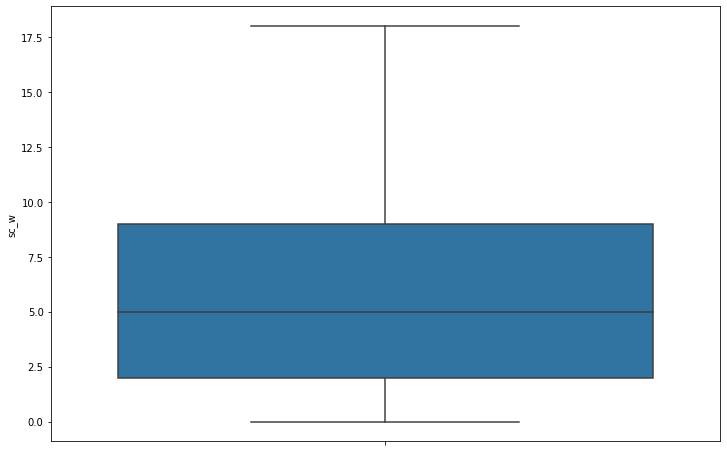

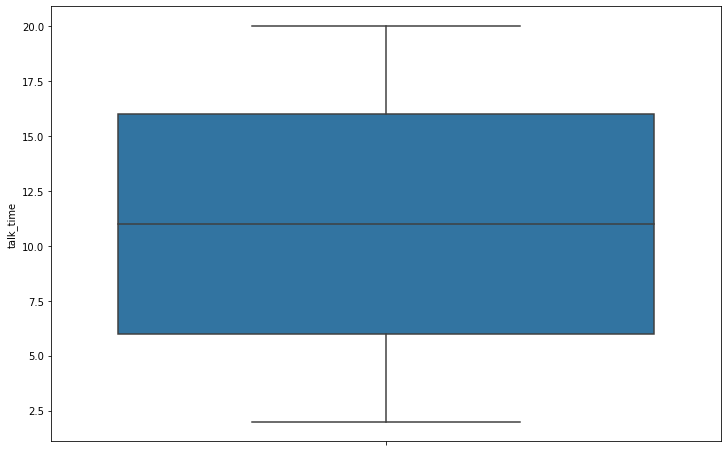

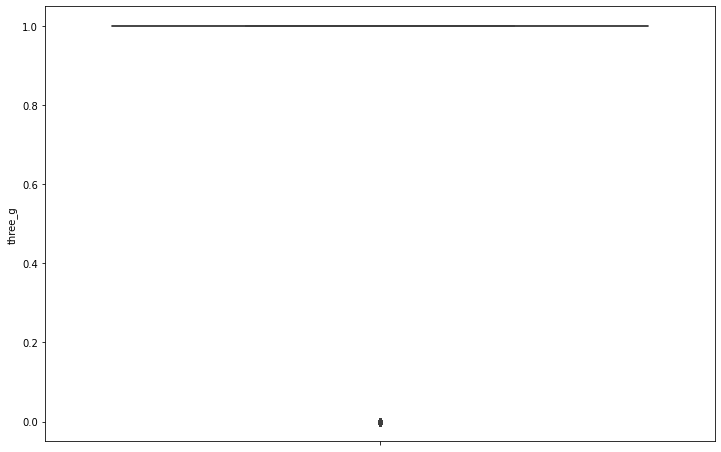

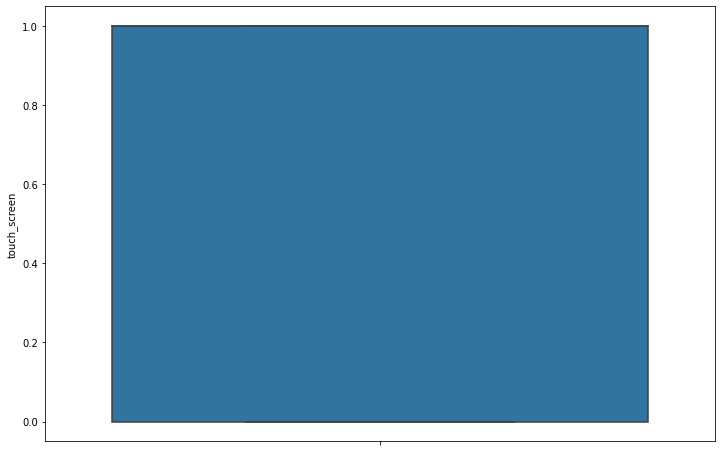

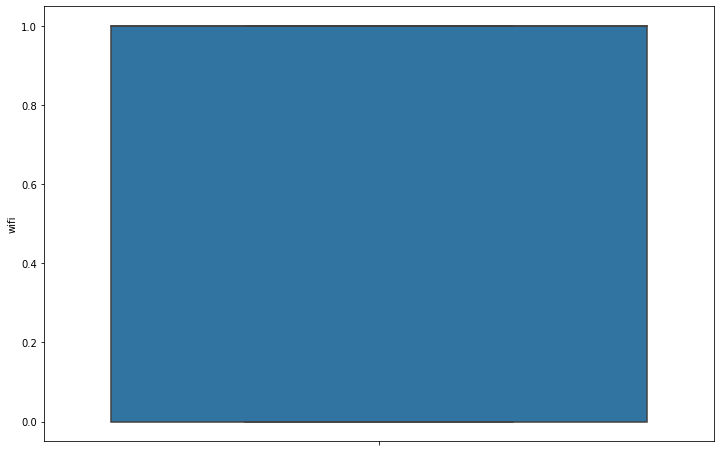

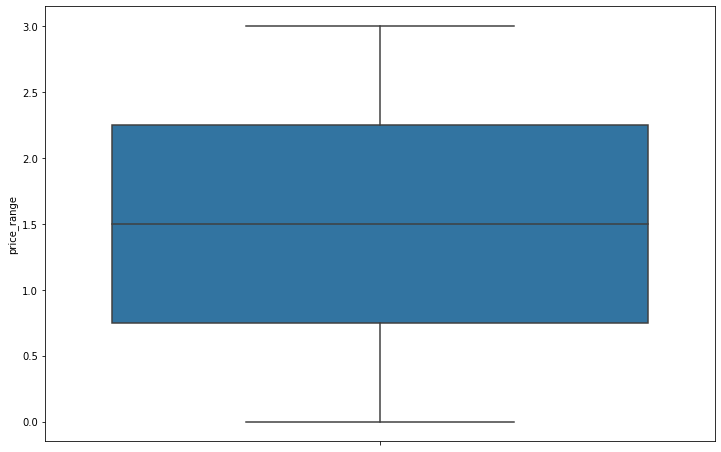

In [11]:
#creating boxplot for outlier detection
for col in list_of_columns:
  plt.figure(figsize=(12,8))
  sns.boxplot(y=df[col])

In [12]:
# Checking datset is balanced or imbalanced
vc=df['price_range']
fig = px.pie(vc, values=vc.value_counts().values, names=vc.value_counts().index, title='Mobile Price Range')
fig.update_traces(hoverinfo='label+percent', textinfo='value')
fig.show()

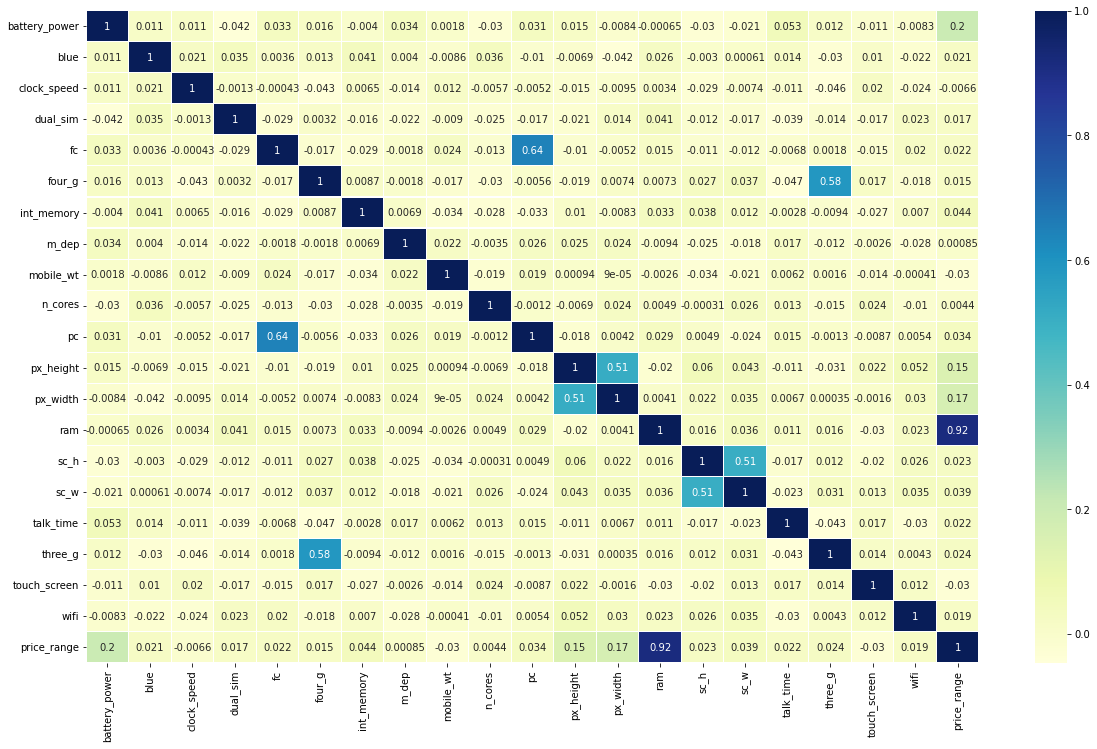

In [13]:
# Heatmap of Correlation matrix for visual understanding
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [14]:
corr = df.corr()
correlation = corr.price_range
price_corr=correlation.sort_values(ascending=False)
price_corr

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

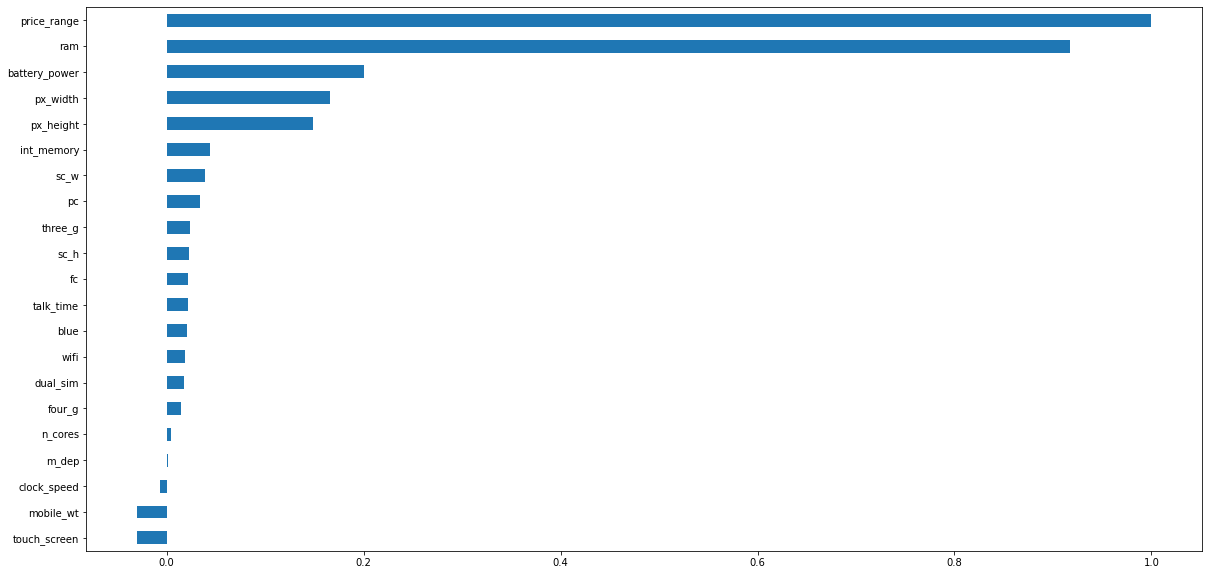

In [15]:
plt.figure(figsize=(20,10))
price_corr.sort_values(ascending=True).plot(kind='barh')

In [16]:
list_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

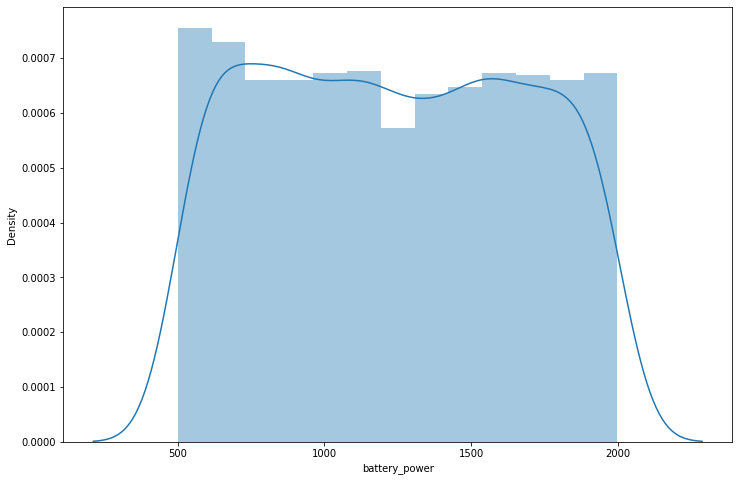

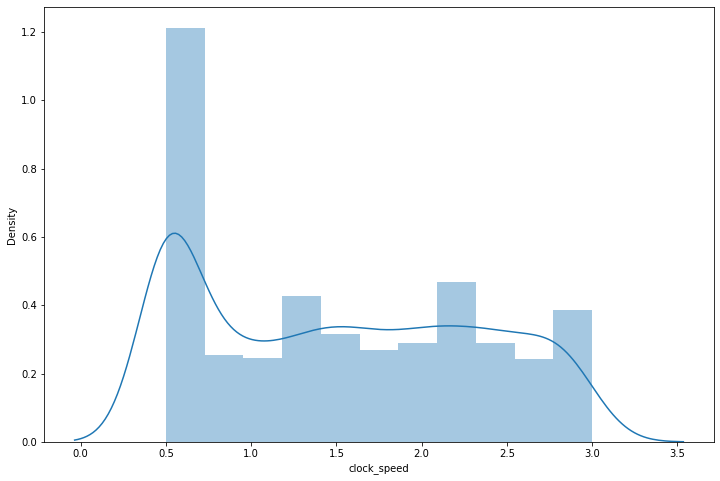

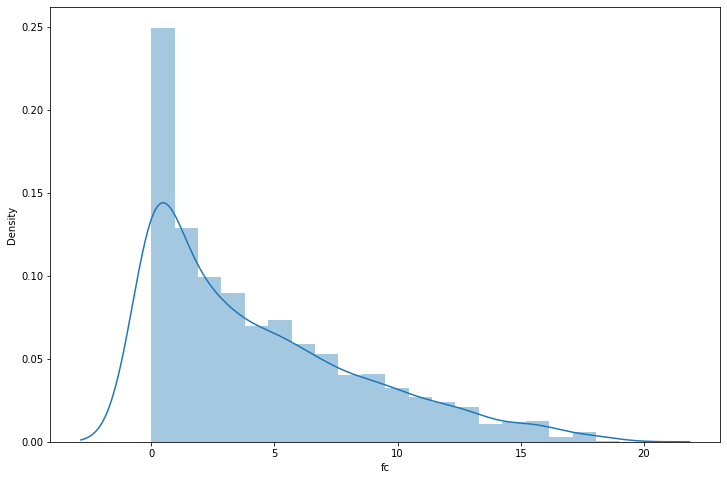

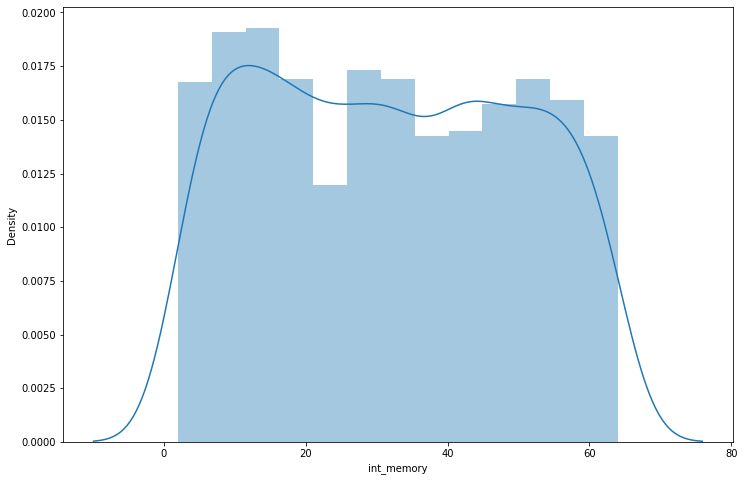

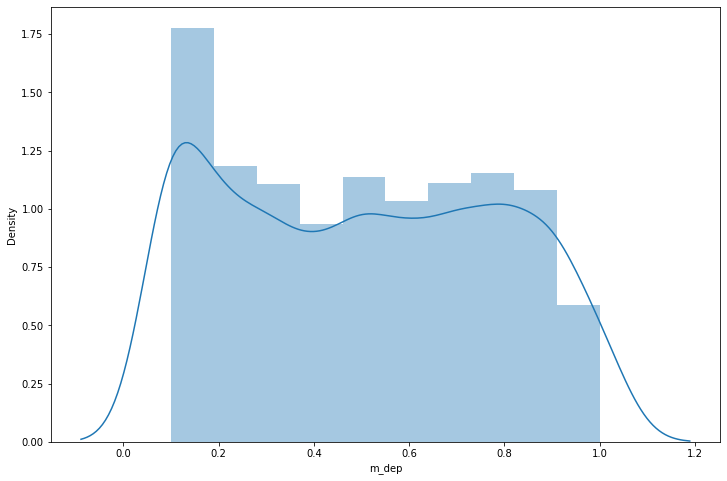

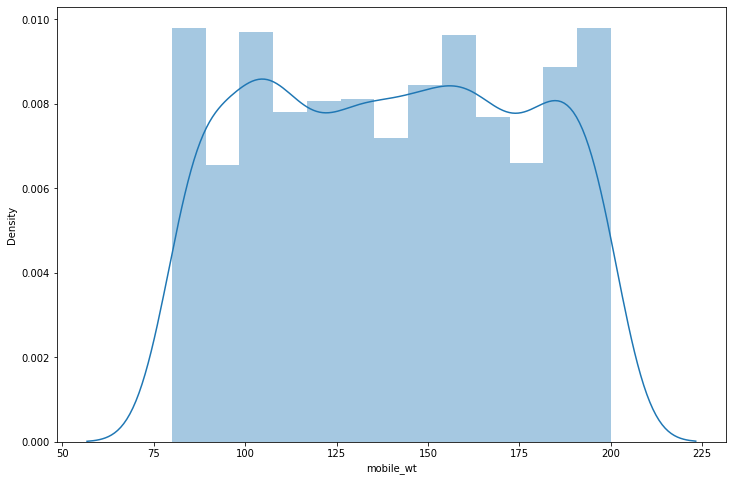

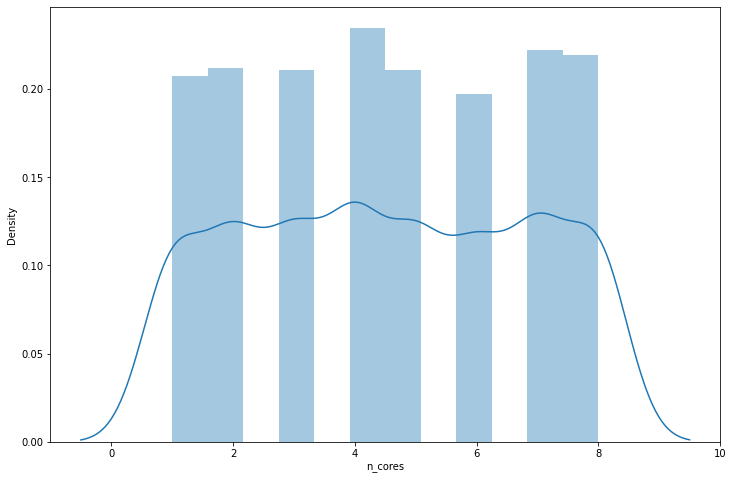

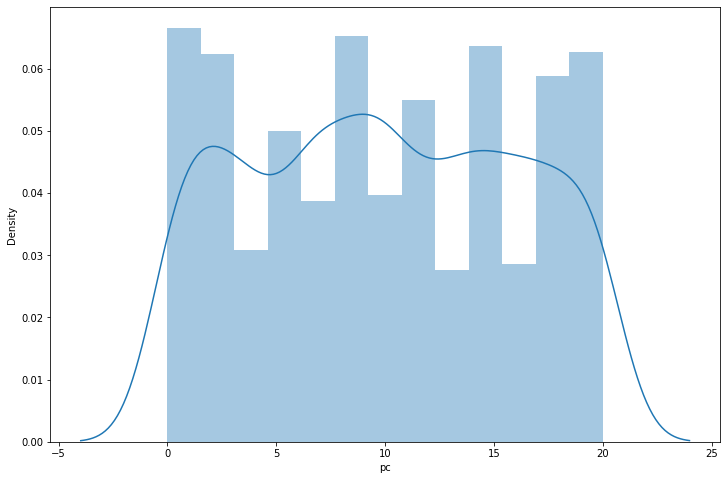

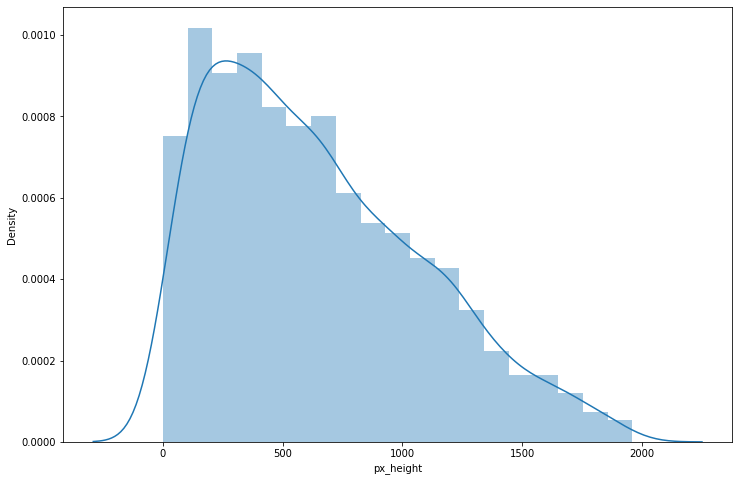

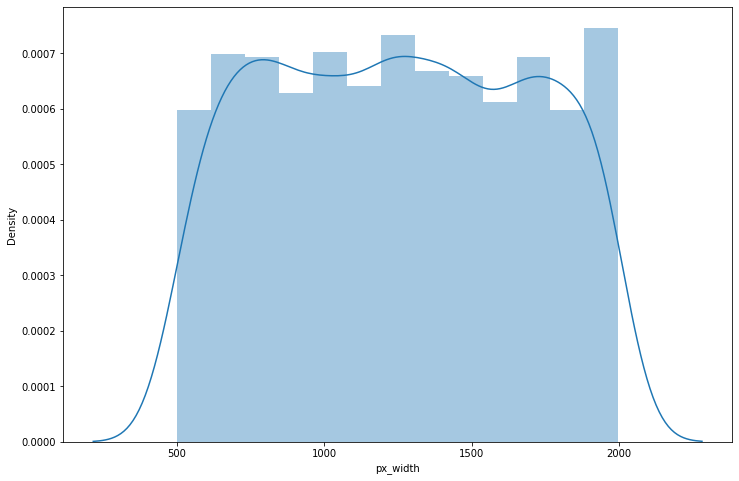

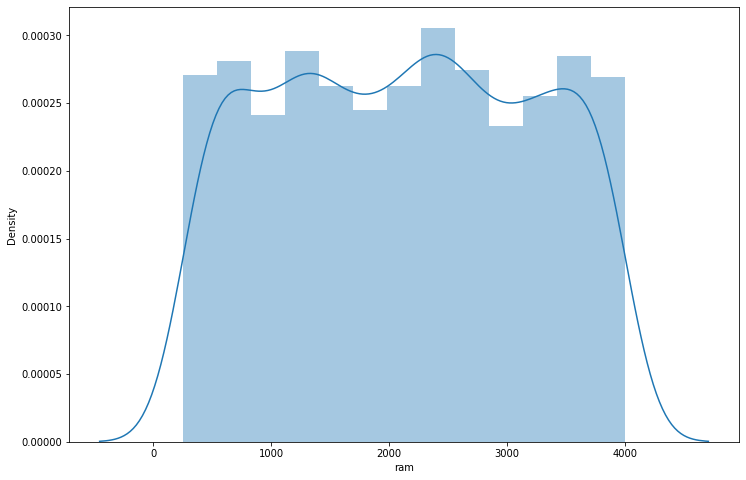

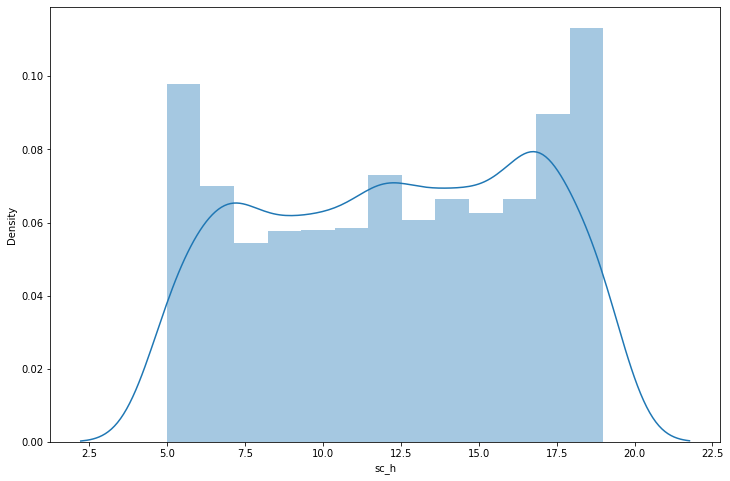

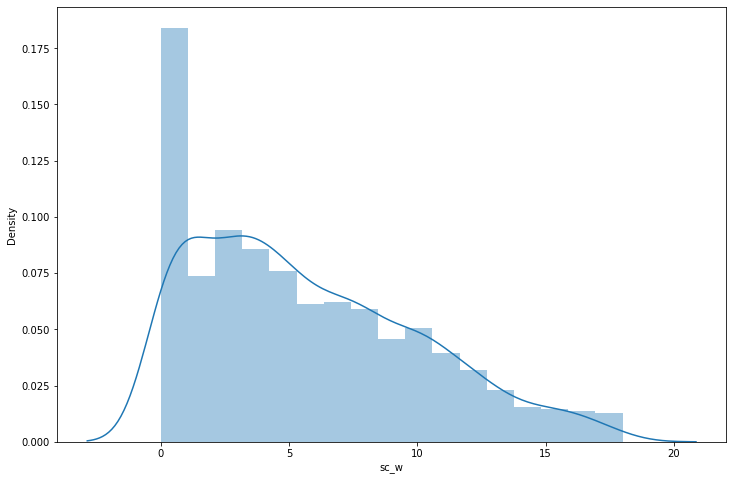

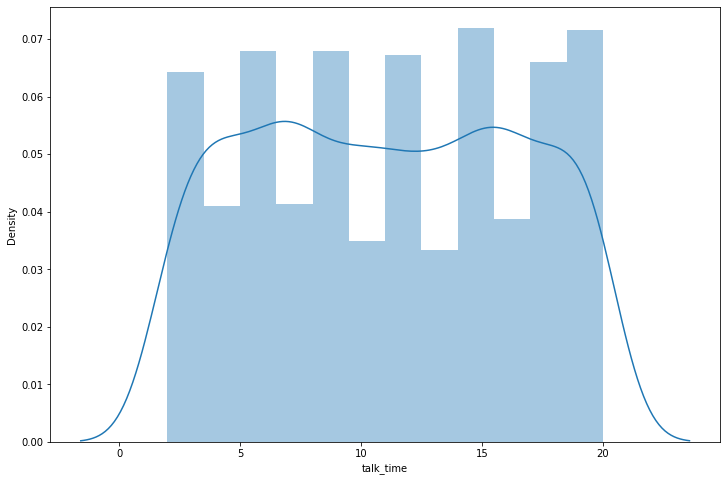

In [17]:
#creating histogram of features
for col in list_col:
  plt.figure(figsize=(12,8))
  sns.distplot(df[col])

In [18]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
X = df.iloc[:,:20]
y = df.iloc[:,[-1]]

In [20]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [21]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores.sort_values(by='Score',ascending=False).head(10)

,Specs,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [22]:
fig1 = px.scatter(df, y='ram', x='price_range',color='price_range')
fig1.update_traces(marker_size=10)

In [23]:
# # box plot to see relationship between dependent variable and independent variables
# plt.figure(figsize=(17,10))
# plt.subplot(2,2,1)
# #sns.jointplot(x='ram',y='price_range',data=df,color='red',kind='kde',shade=True)
# sns.boxplot(x="price_range", y="ram", data=df)

# plt.subplot(2,2,2)
# sns.boxplot(x="price_range", y="battery_power", data=df)

# plt.subplot(2,2,3)
# sns.boxplot(x="price_range", y="px_height", data=df)

# plt.subplot(2,2,4)
# sns.boxplot(x="price_range", y="mobile_wt", data=df)



# plt.subplots_adjust(wspace = 1 ,hspace =0.5 ,top = 0.5 , bottom = 0.1) 
# plt.tight_layout() 
# plt.show()


In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# fig = make_subplots(rows=4, cols=2,subplot_titles=("Price range Vs Ram","Price range Vs Battery","Price range Vs Px Height","Price range Vs Width","Price range Vs Mobileweight","Price range Vs Internal memory","Price range Vs screen width","Price range Vs Talk Time"))

trace0 = go.Box(x=df['price_range'], y=df['ram'],name ='Price range Vs Ram')
trace1 = go.Box(x=df['price_range'], y=df['battery_power'],name ='Price range Vs Battery')
trace2 = go.Box(x=df['price_range'], y=df['px_height'],name ='Price range Vs Px Height')
trace3 = go.Box(x=df['price_range'], y=df['px_width'],name ='Price range Vs Px Width')
trace4 = go.Box(x=df['price_range'], y=df['mobile_wt'],name ='Price range Vs Mobile Weight')
trace5 = go.Box(x=df['price_range'], y=df['int_memory'],name ='Price range Vs Int Memory')
trace6 = go.Box(x=df['price_range'], y=df['sc_w'],name ='Price range Vs Screen width')
trace7 = go.Box(x=df['price_range'], y=df['talk_time'],name ='Price range Vs Talk Time')

fig = make_subplots(rows=2, cols=4)
# First subplot
fig.append_trace(trace0, row=1,col=1)
fig.append_trace(trace1, row=1,col=2)
fig.append_trace(trace2, row=1,col=3)
fig.append_trace(trace3, row=1,col=4)
fig.append_trace(trace4, row=2,col=1)
fig.append_trace(trace5, row=2,col=2)
fig.append_trace(trace6, row=2,col=3)
fig.append_trace(trace7, row=2,col=4)

fig.show()

In [66]:
# from sklearn.preprocessing import MaxAbsScaler

# col = df.iloc[:,:20].columns
# values = df.iloc[:,:20].values 
# scaler = MaxAbsScaler()
# scaled_1 = scaler.fit_transform(values)
# scaled = pd.DataFrame(scaled_1, columns=col)
# scaled.head()

In [67]:
# scaled['price_range']= df['price_range']

In [68]:
# scaled.dtypes

In [61]:
X = df.drop(['price_range'],axis=1)
y = df['price_range']

In [62]:
# Scaling features matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
X1 = std_sc.fit_transform(X=X)

In [63]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

X_train, X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2)

In [64]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [65]:
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:97.9375
Test Set Accuracy:96.5


In [69]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))


Confusion Matrix:
[[ 86   1   0   0]
 [  2  99   1   0]
 [  0   5 105   1]
 [  0   0   4  96]]


In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=101)
dt_model = dt.fit(X_train, y_train)

In [72]:
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

In [73]:
print("Train Set Accuracy:"+str(accuracy_score(dt_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(dt_test_pred,y_test)*100))

Train Set Accuracy:100.0
Test Set Accuracy:81.0
